In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'car_evaluation.csv'
car_data = pd.read_csv(file_path)

# Rename columns for clarity
car_data.columns = ['Buying', 'Maint', 'Doors', 'Persons', 'Lug_boot', 'Safety', 'Class']

label_encoders = {}
for column in car_data.columns:
    label_encoders[column] = LabelEncoder()
    car_data[column] = label_encoders[column].fit_transform(car_data[column])

X = car_data.drop('Class', axis=1)
y = car_data['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Explained Variance Ratios: [0.16684056 0.16684056]


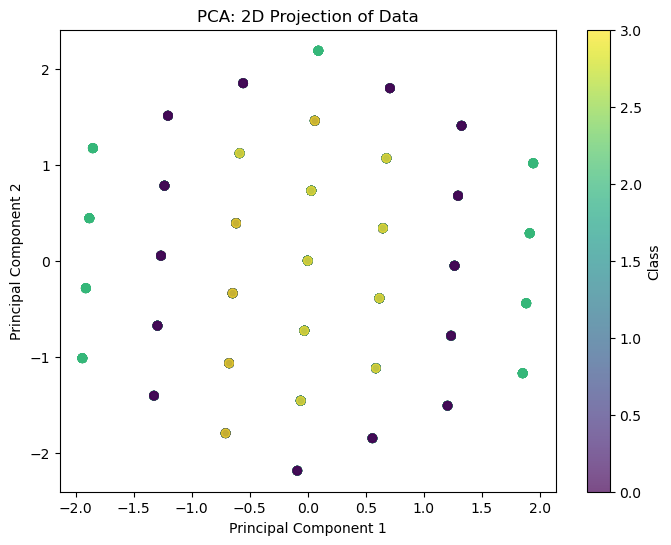

In [11]:

pca = PCA(n_components=2) 
X_pca = pca.fit_transform(X_scaled)


explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratios:", explained_variance)


plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.title('PCA: 2D Projection of Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Class')
plt.show()


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_pca_train, X_pca_test = train_test_split(X_pca, test_size=0.3, random_state=42)

rf_model_original = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model_original.fit(X_train, y_train)
y_pred_original = rf_model_original.predict(X_test)
accuracy_original = accuracy_score(y_test, y_pred_original)

rf_model_pca = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model_pca.fit(X_pca_train, y_train)
y_pred_pca = rf_model_pca.predict(X_pca_test)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

print(f"Random Forest Accuracy (Pre-PCA): {accuracy_original:.2f}")
print(f"Random Forest Accuracy (Post-PCA): {accuracy_pca:.2f}")


Random Forest Accuracy (Pre-PCA): 0.97
Random Forest Accuracy (Post-PCA): 0.70


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_22584\3691745104.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='coolwarm')


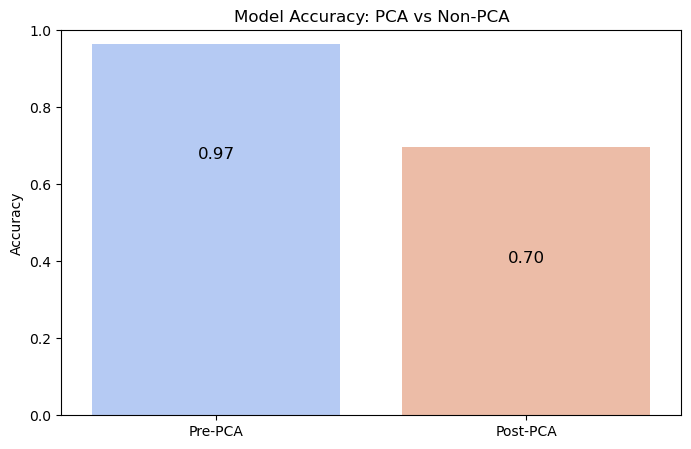

In [32]:

plt.figure(figsize=(8, 5))
models = ['Pre-PCA', 'Post-PCA']
accuracies = [accuracy_original, accuracy_pca]
sns.barplot(x=models, y=accuracies, palette='coolwarm')
plt.title('Model Accuracy: PCA vs Non-PCA')
plt.ylabel('Accuracy')
plt.ylim(0, 1) 
for i, v in enumerate(accuracies):
    plt.text(i, v-0.3, f"{v:.2f}", ha='center', fontsize=12, color='black')

plt.show()


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_22584\2213528124.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[f'PC{i+1}' for i in range(len(explained_variance))], y=explained_variance, palette='viridis')


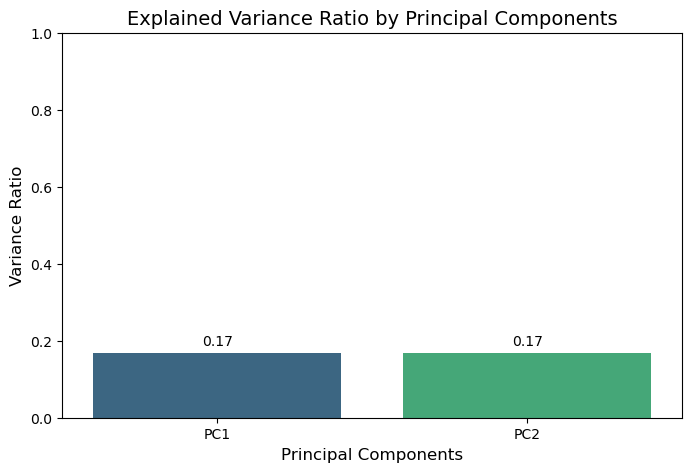

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot explained variance ratio
plt.figure(figsize=(8, 5))
sns.barplot(x=[f'PC{i+1}' for i in range(len(explained_variance))], y=explained_variance, palette='viridis')
plt.title('Explained Variance Ratio by Principal Components', fontsize=14)
plt.xlabel('Principal Components', fontsize=12)
plt.ylabel('Variance Ratio', fontsize=12)
plt.ylim(0, 1)

# Annotate values on top of bars
for i, v in enumerate(explained_variance):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=10, color='black')

plt.show()